In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
combined_lora_list = ['zoom-in-pan-left',
 'zoom-in-pan-right',
 'zoom-in-tilt-up',
 'zoom-in-tilt-down',
 'zoom-in-rolling-clockwise',
 'zoom-in-rolling-anticlockwise',
 'zoom-out-pan-left',
 'zoom-out-pan-right',
 'zoom-out-tilt-up',
 'zoom-out-tilt-down',
 'zoom-out-rolling-clockwise',
 'zoom-out-rolling-anticlockwise']

In [10]:
flows_1 = np.load("./DLOW/generated/block0_zoom-in-pan-left/reduced_dlow.npy")
flows_2 = np.load("./DLOW/generated/block0_zoom-in-pan-right/reduced_dlow.npy")
flows_3 = np.load("./DLOW/generated/zoom-in/reduced_dlow.npy")

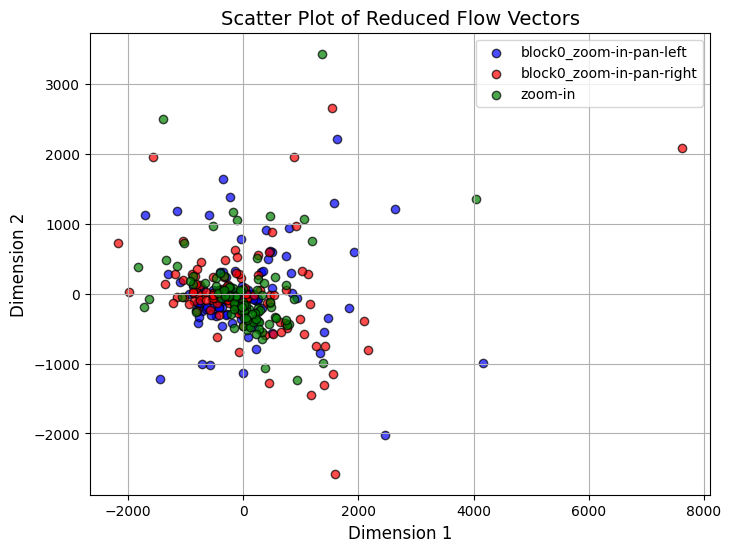

In [11]:
# 创建散点图
plt.figure(figsize=(8, 6))
plt.scatter(flows_1[:, 0], flows_1[:, 1], c='blue', alpha=0.7, edgecolors='k', label='block0_zoom-in-pan-left')
plt.scatter(flows_2[:, 0], flows_2[:, 1], c='red', alpha=0.7, edgecolors='k', label='block0_zoom-in-pan-right')
plt.scatter(flows_3[:, 0], flows_3[:, 1], c='green', alpha=0.7, edgecolors='k', label='zoom-in')

# 添加标题和标签
plt.title("Scatter Plot of Reduced Flow Vectors", fontsize=14)
plt.xlabel("Dimension 1", fontsize=12)
plt.ylabel("Dimension 2", fontsize=12)
plt.grid(True)
plt.legend()

# 显示图表
plt.show()


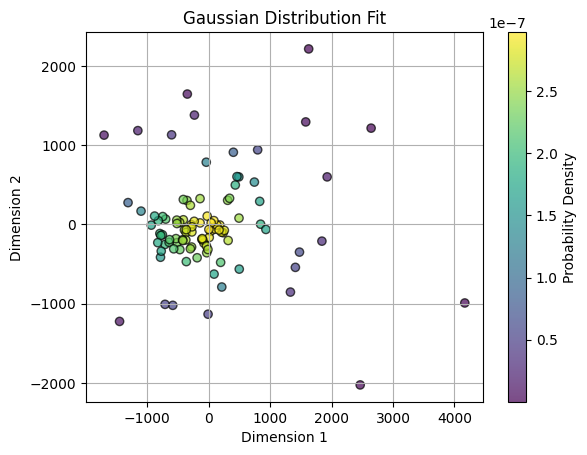

In [ ]:
data = flows_1

# 计算均值和协方差
mu = np.mean(data, axis=0)
sigma = np.cov(data, rowvar=False)  # 协方差矩阵 (2,2)

# 生成概率密度函数
rv = multivariate_normal(mu, sigma)

# 计算每个点的概率
probs = rv.pdf(data)

# 画散点图，颜色根据概率密度
plt.scatter(data[:, 0], data[:, 1], c=probs, cmap='viridis', edgecolors='k', alpha=0.7)
plt.colorbar(label="Probability Density")
plt.title("Gaussian Distribution Fit")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()

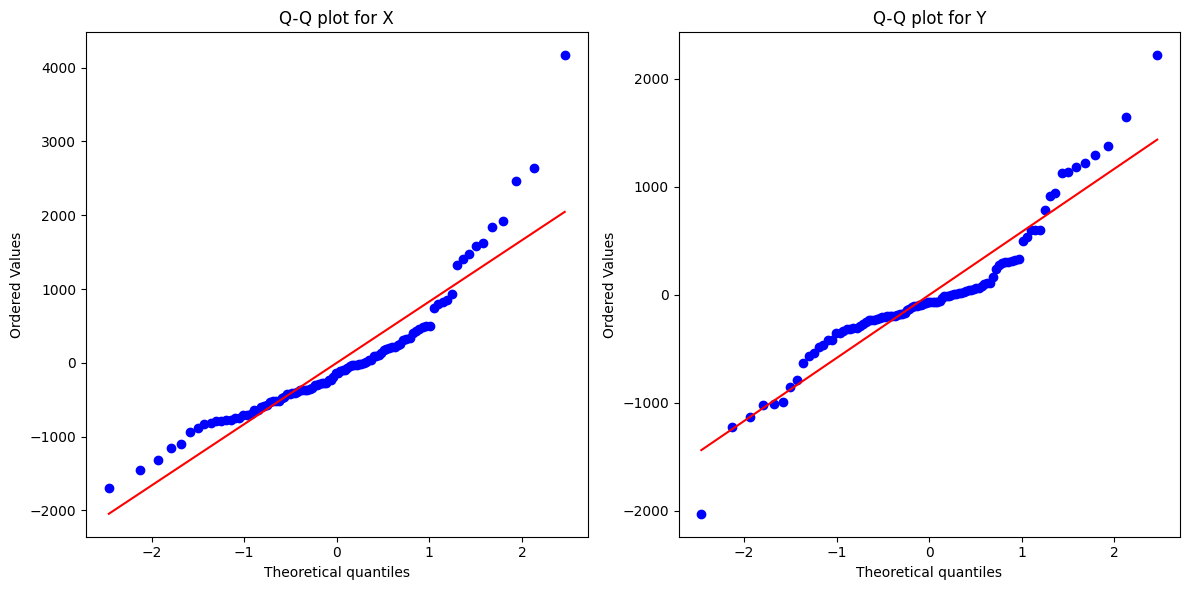

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# 2. 分别提取 X 和 Y 数据
x = data[:, 0]
y = data[:, 1]

# 3. 对每个维度绘制 Q-Q 图进行正态性检验
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 对 X 轴数据进行 Q-Q 图检验
stats.probplot(x, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot for X')

# 对 Y 轴数据进行 Q-Q 图检验
stats.probplot(y, dist="norm", plot=axes[1])
axes[1].set_title('Q-Q plot for Y')

plt.tight_layout()
plt.show()


In [19]:
from scipy.stats import multivariate_normal
import os

dlows_path = "./DLOW/generated"

In [23]:
mu_list = []
sigma_list = []
for path in os.listdir(dlows_path)[:6]:
    print(path)
    lora_dlows_path = os.path.join(dlows_path, f"{path}/reduced_dlow.npy")
    data = np.load(lora_dlows_path)
    
    # 计算均值和协方差
    mu = np.mean(data, axis=0)
    sigma = np.cov(data, rowvar=False)  # 协方差矩阵 (2,2)
    mu_list.append(mu)
    sigma_list.append(sigma)

zoom_in_data = np.load("./DLOW/generated/zoom-in/reduced_dlow.npy")
zoom_in_mu = np.mean(zoom_in_data, axis=0)
zoom_in_sigma = np.cov(zoom_in_data, rowvar=False)

block0_zoom-in-pan-left
block0_zoom-in-pan-right
block0_zoom-in-tilt-up
block0_zoom-in-tilt-down
block0_zoom-in-rolling-clockwise
block0_zoom-in-rolling-anticlockwise


In [3]:
from scipy.stats import multivariate_normal
from scipy.linalg import det, inv

def kl_divergence(mu1, sigma1, mu2, sigma2):
    """
    计算两个 2D 高斯分布的 KL 散度
    """
    sigma2_inv = inv(sigma2)  # 计算 Σ_Q 的逆
    trace_term = np.trace(sigma2_inv @ sigma1)  # Tr(Σ_Q^-1 * Σ_P)
    mean_diff = (mu2 - mu1).reshape(-1, 1)  # 变成列向量
    quadratic_term = mean_diff.T @ sigma2_inv @ mean_diff  # 二次项
    log_det_term = np.log(det(sigma2) / det(sigma1))  # 行列式比值的对数
    d = len(mu1)  # 维度 d=2

    return 0.5 * (trace_term + quadratic_term - d + log_det_term)

In [ ]:


# 计算每个高斯分布与目标高斯分布的KL距离
kl_values = []
for mu, sigma in zip(mu_list, sigma_list):
    kl_value = kl_divergence(mu, sigma, zoom_in_mu, zoom_in_sigma)
    kl_values.append(kl_value)

# 打印KL距离
for i, kl in enumerate(kl_values):
    print(f"KL Divergence between target and distribution {i+1}: {kl}")

KL Divergence between target and distribution 1: [[0.04363086]]
KL Divergence between target and distribution 2: [[0.29091793]]
KL Divergence between target and distribution 3: [[0.35239253]]
KL Divergence between target and distribution 4: [[0.3142773]]
KL Divergence between target and distribution 5: [[0.06693102]]
KL Divergence between target and distribution 6: [[0.40728454]]


/tmp/ipykernel_296055/3321054815.py:16: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z, colors=colors[i], label=f'Distribution {i+1}')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


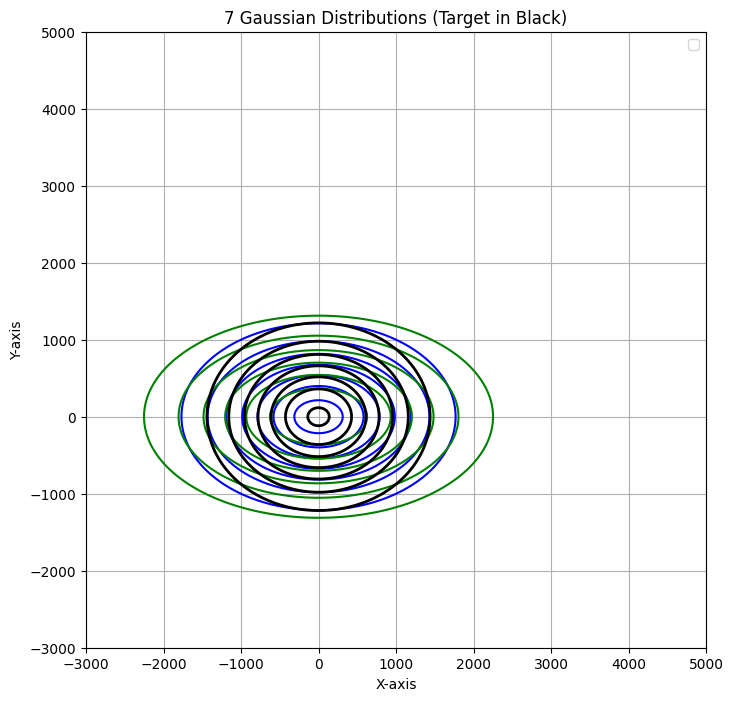

In [33]:
# 创建网格点
x = np.linspace(-3000, 5000, 300)
y = np.linspace(-3000, 5000, 300)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 绘制每个高斯分布的等高线
plt.figure(figsize=(8, 8))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

# 绘制6个高斯分布
for i, (mu, sigma) in enumerate(zip(mu_list[:2], sigma_list[:2])):
    rv = multivariate_normal(mu, sigma)
    Z = rv.pdf(pos)
    plt.contour(X, Y, Z, colors=colors[i], label=f'Distribution {i+1}')

# 绘制目标高斯分布
mu_target = zoom_in_mu
sigma_target = zoom_in_sigma
rv_target = multivariate_normal(mu_target, sigma_target)
Z_target = rv_target.pdf(pos)
plt.contour(X, Y, Z_target, colors='black', linewidths=2)

# 设置图形显示
plt.title('7 Gaussian Distributions (Target in Black)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设有 4 个 base LoRA 和 3 个 sub LoRA，block 数量为 6
base_loras = ["zoom-in", "zoom-out"]
sub_loras = ["pan-left", "pan-right", "tilt-up", "tilt-down", "rolling-clockwise", "rolling-anticlockwise"]
blocks = list(range(5))
blocks

[0, 1, 2, 3, 4]

In [9]:
# 计算均值和协方差
def calculate_gaussian(data):
    mu = np.mean(data, axis=0)
    sigma = np.cov(data, rowvar=False)  # 协方差矩阵 (2,2)
    return mu, sigma

In [14]:
def generate():
    kl_distances = dict()
    for base in base_loras:

        lora_dlows_path = f"./DLOW/generated/{base}/reduced_dlow.npy"
        base_data = np.load(lora_dlows_path)
        base_mu, base_sigma = calculate_gaussian(base_data)

        for block in blocks:
            for sub in sub_loras:
                lora_dlows_path = f"./DLOW/generated/block{block}_{base}-{sub}/reduced_dlow.npy"
                data = np.load(lora_dlows_path)
                mu, sigma = calculate_gaussian(data)
            
                kl_value = kl_divergence(mu, sigma, base_mu, base_sigma)
                kl_distances[(base, sub, block)] = kl_value
    return kl_distances

kl_distances = generate()

# 创建表格（DataFrame）
rows = []
for i, base in enumerate(base_loras):
    for j, sub in enumerate(sub_loras):
        row = [base, sub] + [kl_distances[(base, sub, block)] for block in blocks]
        rows.append(row)

columns = ["Base LoRA", "Sub LoRA"] + blocks
df = pd.DataFrame(rows, columns=columns)

# 打印表格
print(df)

   Base LoRA               Sub LoRA                         0  \
0    zoom-in               pan-left    [[0.0436308577071626]]   
1    zoom-in              pan-right    [[0.2909179280568832]]   
2    zoom-in                tilt-up   [[0.35239253051885355]]   
3    zoom-in              tilt-down    [[0.3142772970454035]]   
4    zoom-in      rolling-clockwise   [[0.06693102228190814]]   
5    zoom-in  rolling-anticlockwise    [[0.4072845363488995]]   
6   zoom-out               pan-left   [[0.05808345321941305]]   
7   zoom-out              pan-right    [[0.4424276108241123]]   
8   zoom-out                tilt-up    [[1.1125524852684656]]   
9   zoom-out              tilt-down    [[1.4376099626955607]]   
10  zoom-out      rolling-clockwise  [[0.051651646161452014]]   
11  zoom-out  rolling-anticlockwise    [[0.3079163234091916]]   

                           1                         2  \
0    [[0.18178520923692376]]   [[0.29813434839938524]]   
1    [[0.31192654022684185]]    [[0.31

/tmp/ipykernel_462778/1352399630.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sns.heatmap(df_numeric, annot=True, cmap="coolwarm", xticklabels=blocks, yticklabels=df[["Base LoRA", "Sub LoRA"]].apply(lambda x: f"{x[0]}-{x[1]}", axis=1))


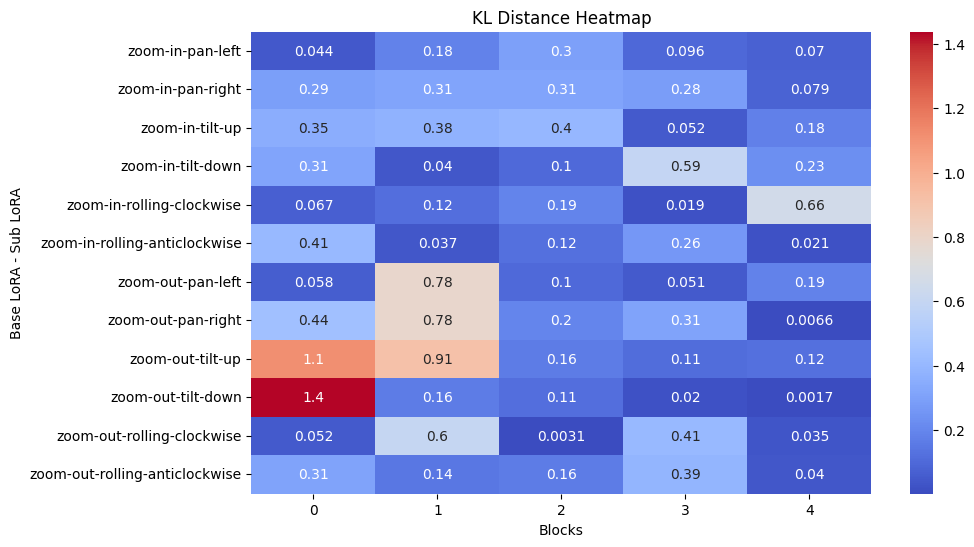

In [15]:
# 绘制热力图
plt.figure(figsize=(10, 6))
df_numeric = df.drop(columns=["Base LoRA", "Sub LoRA"]).astype(float)
sns.heatmap(df_numeric, annot=True, cmap="coolwarm", xticklabels=blocks, yticklabels=df[["Base LoRA", "Sub LoRA"]].apply(lambda x: f"{x[0]}-{x[1]}", axis=1))
plt.title("KL Distance Heatmap")
plt.xlabel("Blocks")
plt.ylabel("Base LoRA - Sub LoRA")
plt.show()

In [22]:
df = df.drop(columns=["Total Distance"])

In [23]:
df.iloc[0, 2:]

0     [[0.0436308577071626]]
1    [[0.18178520923692376]]
2    [[0.29813434839938524]]
3    [[0.09624523659305312]]
4    [[0.06970520185591317]]
Name: 0, dtype: object

In [28]:
df.iloc[:, 2:].sum(axis=1)

0     [[0.6895008537924379]]
1     [[1.2758440803586395]]
2      [[1.357684057304285]]
3     [[1.2755561833667217]]
4     [[1.0508256289599887]]
5     [[0.8490566704235049]]
6     [[1.1773242668314081]]
7      [[1.735826019208558]]
8      [[2.425294738398467]]
9     [[1.7373662405329522]]
10    [[1.0951242905730698]]
11    [[1.0418207241094157]]
dtype: object

In [29]:
df["Total Distance"] = df.iloc[:, 2:].sum(axis=1)
df

,Base LoRA,Sub LoRA,0,1,2,3,4,Total Distance
0,zoom-in,pan-left,[[0.0436308577071626]],[[0.18178520923692376]],[[0.29813434839938524]],[[0.09624523659305312]],[[0.06970520185591317]],[[0.6895008537924379]]
1,zoom-in,pan-right,[[0.2909179280568832]],[[0.31192654022684185]],[[0.3116415688387466]],[[0.2824459587758489]],[[0.07891208446031911]],[[1.2758440803586395]]
2,zoom-in,tilt-up,[[0.35239253051885355]],[[0.37566291301572363]],[[0.39995371313250927]],[[0.051673068871097454]],[[0.17800183176610118]],[[1.357684057304285]]
3,zoom-in,tilt-down,[[0.3142772970454035]],[[0.03997171434678051]],[[0.10026964156742774]],[[0.5916403225064722]],[[0.22939720790063767]],[[1.2755561833667217]]
4,zoom-in,rolling-clockwise,[[0.06693102228190814]],[[0.11760460880646831]],[[0.19154267046149548]],[[0.0190406197139827]],[[0.6557067076961339]],[[1.0508256289599887]]
5,zoom-in,rolling-anticlockwise,[[0.4072845363488995]],[[0.036504591477065106]],[[0.11985239509179468]],[[0.264878843514819]],[[0.0205363039909267]],[[0.8490566704235049]]
6,zoom-out,pan-left,[[0.05808345321941305]],[[0.783237965624723]],[[0.10032866759858666]],[[0.05057009506418808]],[[0.1851040853244974]],[[1.1773242668314081]]
7,zoom-out,pan-right,[[0.4424276108241123]],[[0.7836701277236082]],[[0.19783517303972764]],[[0.30528607690033366]],[[0.00660703072077623]],[[1.735826019208558]]
8,zoom-out,tilt-up,[[1.1125524852684656]],[[0.9129943289508106]],[[0.16421523269228466]],[[0.11069372527314272]],[[0.124838966213763]],[[2.425294738398467]]
9,zoom-out,tilt-down,[[1.4376099626955607]],[[0.1639791832206683]],[[0.11400797069563406]],[[0.02004950966447025]],[[0.0017196142566189027]],[[1.7373662405329522]]
